In [1]:
import time                                                 # para tiempo
inicio=time.time()                                          # momento inicial

import pandas as pd                                         # dataframe
import numpy as np                                          # numerical python, algebra lineal
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt                             # plots, graficos
import seaborn as sns                                       # plots

import warnings                                             # avisos
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [2]:
from sklearn.model_selection import train_test_split as tts

In [3]:
from sklearn.linear_model import LinearRegression as LinReg

In [4]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import SGDClassifier as SGDC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.naive_bayes import ComplementNB as CNB

In [5]:
from sklearn.metrics import mean_squared_error as mse

In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import *

**Funciones**


In [8]:
def trash_d(df):
    df_col = df.columns
    trash = []
    for i in df_col:
        if 'url' in i:

            trash.append(i)
        elif 'id' in i:

            trash.append(i)
        elif 'name' in i:

            trash.append(i)
        elif 'scrape' in i:

            trash.append(i)
        elif 'license' in i: #is it relevant??

            trash.append(i)
        elif 'latitude' in i:

            trash.append(i)
        elif 'longitude' in i:

            trash.append(i)

    print(trash)
    return df.drop(trash,axis=1,inplace=True)

In [9]:
def delete_nan(df):
    data_1 = df.loc[:, df.isnull().mean() >= .5]
    print(data_1.columns)
    return df.drop(data_1,axis=1,inplace=True)

In [10]:
def bin_corr_col(x):
                                        
    corr_matrix = x.corr().abs()# Create correlation matrix
                                        
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Select upper triangle of correlation matrix
    
    to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]# Find features with correlation greater than 0.90
    print(to_drop)

    return x.drop(to_drop, axis=1, inplace=True) # Drop features

In [11]:
def fill_nan(df):
    
    for i in df.columns:
        
        df.fillna(0, inplace=True)
     #round(df[i].mean(),3)

    print(df.isna().sum())

In [12]:
import re

patron='[0-9]+'

def limpieza_ba(x):
    n_ba=0
    
    try:
        n_ba=int(re.findall(patron, x)[0])
    except:
        n_ba=0
        
    return n_ba

In [13]:
def prueba_modelo(modelo):

    modelo.fit(X_train, y_train)

    y_pred=modelo.predict(X_test)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    
    print(modelo)
    print('Train:', train_score)
    print('Test:', test_score) 
    print('\n')

In [14]:
def review_scores(df):
    df_NAN_1 = df.copy()
    df_NAN_2=df_NAN_1[['review_scores_rating','review_scores_checkin','review_scores_location']]
    df_NAN_3 = df_NAN_2.apply(fill_nan)
    df.assign(RER=df_NAN_3.review_scores_rating.values,
              RSC=df_NAN_3.review_scores_checkin.values,
              RSL=df_NAN_3.review_scores_location.values)
    
    

## 1.Train CSV:

**Import Train Data:**

In [15]:
df_train = pd.read_csv('data/train.csv')

In [16]:
df_TN = df_train._get_numeric_data()

In [17]:
trash_d(df_TN)

['id', 'scrape_id', 'host_id', 'latitude', 'longitude']


In [18]:
bin_corr_col(df_TN)

['host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_60', 'availability_90']


In [19]:
fill_nan(df_TN)

host_listings_count                             0
neighbourhood_group_cleansed                    0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
calendar_updated                                0
availability_30                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0


### Definicion de Modelo con Train: 

- De aqui sacamos la variabl modelo, para hacer la prediccion con el TEST!!

### 1. LinReg

In [20]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = tts(df_TN.drop('price',axis=1), 
                                               df_TN.price)

In [21]:
modelo_LR=LinReg()

modelo_LR.fit(X_train_lr, y_train_lr)

LinearRegression()

In [22]:
### 1.3.1 R2

In [23]:
modelo_LR.score(X_test_lr, y_test_lr)# R2 cuanto mas cercano a 1 mejor 

0.04878944720865819

In [24]:
y_pred_LR=modelo_LR.predict(X_test_lr)
y_pred_LR.shape

(1042,)

### 1.3.2 MSE (Mean Squared Error)

In [25]:
mse(y_pred_LR, y_test_lr, squared=False)

287.02568887859434

### Lasso

In [26]:
X_train_lss, X_test_lss, y_train_lss, y_test_lss = tts(df_TN.drop('price',axis=1), 
                                               df_TN.price)

In [27]:
modelo_LSS=Lasso()

modelo_LSS.fit(X_train_lss, y_train_lss)

Lasso()

In [28]:
### 1.3.1 R2

In [29]:
modelo_LSS.score(X_test_lss, y_test_lss)# R2 cuanto mas cercano a 1 mejor 

0.0017432795418576008

In [30]:
y_pred_LSS=modelo_LSS.predict(X_test_lss)
y_pred_LSS.shape

(1042,)

### 1.3.2 MSE (Mean Squared Error)

In [31]:
mse(y_pred_LSS, y_test_lss, squared=False)

298.6547405920676

### RFR

In [32]:
X_train, X_test, y_train, y_test = tts(df_TN.drop('price',axis=1), 
                                               df_TN.price)

In [33]:
modelo_RFR=RFR()

modelo_RFR.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
### 1.3.1 R2

In [35]:
modelo_RFR.score(X_test, y_test)# R2 cuanto mas cercano a 1 mejor 

0.22215525316921314

In [36]:
y_pred=modelo_RFR.predict(X_test)
y_pred.shape

(1042,)

### 1.3.2 MSE (Mean Squared Error)

In [37]:
mse(y_pred, y_test, squared=False)

203.57979798128434

### Feature importances with a forest of trees

In [38]:
X, y = make_classification(
    n_samples=1000,
    n_features=28,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [39]:


feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [40]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

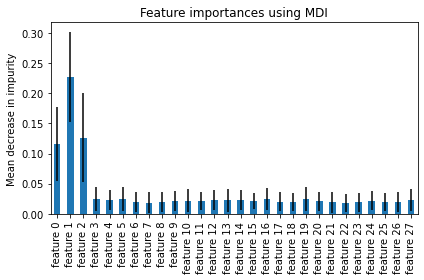

In [41]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

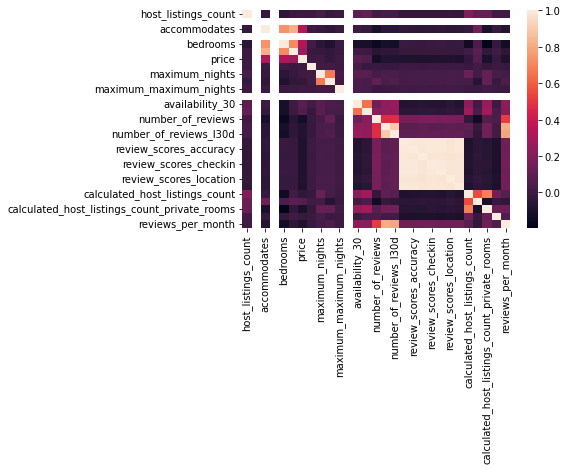

In [42]:
sns.heatmap(df_TN.corr());

## 2. Test CSV:

In [43]:
df_ts=pd.read_csv('data/test.csv')

In [44]:
df_test= df_ts._get_numeric_data()

In [45]:
trash_d(df_test)

['id', 'scrape_id', 'host_id', 'latitude', 'longitude']


In [46]:
bin_corr_col(df_test)

['host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_60', 'availability_90']


In [47]:
fill_nan(df_test)

host_listings_count                             0
neighbourhood_group_cleansed                    0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
calendar_updated                                0
availability_30                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0


### Prediction on Test DF LinReG

Here we place the **Test DF** into the model we have trained. 



In [48]:
y_pred_LR=modelo_LR.predict(df_test)

In [49]:
y_pred_LR.shape

(1389,)

In [50]:
f"Train : {modelo_LR.score(X_train_lr, y_train_lr)} Test: {modelo_LR.score(X_test_lr, y_test_lr)}"


'Train : 0.37721033363694256 Test: 0.04878944720865819'

In [51]:
modelo_LR.fit(X_train_lr, y_train_lr)

LinearRegression()

In [52]:
train_score=modelo_LR.score(X_train_lr, y_train_lr)  
test_score=modelo_LR.score(X_test_lr, y_test_lr)
    
print(modelo_LR)
print('Train:', train_score)
print('Test:', test_score) 
print('\n')

LinearRegression()
Train: 0.37721033363694256
Test: 0.04878944720865819




Submition 5:

    *LinearRegression()
    Train: 0.14651660992370874
    Test: 0.3820126818795656

R2 = 100.87018

In [53]:
y_pred_LR.shape

(1389,)

### Prediction on Test DF RFR

Here we place the **Test DF** into the model we have trained. 



In [54]:
y_pred_LSS=modelo_LSS.predict(df_test)

In [55]:
y_pred_LSS.shape

(1389,)

In [56]:
modelo_LSS.fit(X_train_lss, y_train_lss)

Lasso()

In [57]:
train_score=modelo_LSS.score(X_train_lss, y_train_lss)  
test_score=modelo_LSS.score(X_test_lss, y_test_lss)
    
print(modelo_LSS)
print('Train:', train_score)
print('Test:', test_score) 
print('\n')

Lasso()
Train: 0.3738199888371728
Test: 0.0017432795418576008




**MODELOS VARIOS:**

In [58]:
df_TN.head()

,host_listings_count,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_maximum_nights,maximum_maximum_nights,calendar_updated,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13,0.0,3,0.0,1.0,0.0,87.0,2,1125,1125.0,1125.0,0.0,0,249,81,0,0,4.62,4.56,4.29,4.57,4.75,4.69,4.49,10,0,10,0,0.91
1,0,0.0,4,0.0,2.0,2.0,250.0,2,1125,1125.0,1125.0,0.0,3,3,9,4,1,5.00,5.00,5.00,4.89,5.00,5.00,4.89,1,1,0,0,0.40
2,20,0.0,2,0.0,1.0,1.0,151.0,1,1125,99.0,99.0,0.0,25,267,47,3,1,4.79,4.83,4.91,4.62,4.87,4.87,4.40,20,4,0,0,1.25
3,1,0.0,2,0.0,1.0,1.0,139.0,2,30,1125.0,1125.0,0.0,0,0,10,3,0,5.00,5.00,4.80,5.00,5.00,4.90,4.70,1,1,0,0,0.31
4,1,0.0,2,0.0,1.0,2.0,95.0,2,7,7.0,7.0,0.0,18,349,166,1,0,4.67,4.76,4.81,4.95,4.89,4.49,4.57,1,0,1,0,1.78


In [59]:
X=df_TN.drop('price', axis=1)
y=df_TN.price

In [60]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       test_size=0.15, random_state=42)

In [61]:
modelos=[LinReg(), Lasso(),RFR(),SGDC(),GNB(),MNB(),CNB()]

for m in modelos:
    prueba_modelo(m)

LinearRegression()
Train: 0.15079392098382138
Test: 0.3669937014652208


Lasso()
Train: 0.14630146288014012
Test: 0.36732441984262476


RandomForestRegressor()
Train: 0.8973628105684543
Test: 0.4317148599565501




/opt/homebrew/Caskroom/miniconda/base/envs/ironhack_2/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier()
Train: 0.0008472182999152782
Test: 0.0


GaussianNB()
Train: 0.04207850889579215
Test: 0.04472843450479233


MultinomialNB()
Train: 0.04631460039536854
Test: 0.004792332268370607


ComplementNB()
Train: 0.042925727195707426
Test: 0.04792332268370607




Submition 5:

    *LinearRegression()
    Train: 0.14651660992370874
    Test: 0.3820126818795656

R2_Kaggle = 100.87018

Submition 7:

    *RandomForestRegressor()
    Train: 0.9611092937754674
    Test: 0.6794674859190988
    
R2_Kaggle = 97.74893

Submition 8: (Thisone ot LinReg)

    *RandomForestRegressor()
    Train: 0.9613236998741297
    Test: 0.6987391193036354
  
R2_Kaggle = 93.99070


In [62]:
#y_pred_lr.shape

### Guardar modelo:

Here we place the 

In [63]:
sample_df_9=pd.DataFrame()


sample_df_9['id']=[str(i) for i in range(len(y_pred_lr))]
sample_df_9['price']=y_pred_lr

sample_df_9.shape

NameError: name 'y_pred_lr' is not defined

In [ ]:
sample_df_8.head()

In [ ]:
#sample_df_9.to_csv('data/sample_df_8.csv',index=False)